### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split

### Import Dataset

In [2]:
data_set = pd.read_csv(r"I:\1.CSE\Thesis\LCPUMLA\Datasets\lung_cancer1.csv")

### Show dataset's row and column

In [3]:
data_set.shape

(1000, 25)

### Dataset's head 

In [4]:
data_set.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### Data types of dataset columns 

In [5]:
data_set.dtypes

Patient Id               object
Age                       int64
Gender                    int64
AirPollution              int64
Alcoholuse                int64
DustAllergy               int64
OccuPationalHazards       int64
GeneticRisk               int64
chronicLungDisease        int64
BalancedDiet              int64
Obesity                   int64
Smoking                   int64
PassiveSmoker             int64
ChestPain                 int64
CoughingofBlood           int64
Fatigue                   int64
WeightLoss                int64
ShortnessofBreath         int64
Wheezing                  int64
SwallowingDifficulty      int64
ClubbingofFingerNails     int64
FrequentCold              int64
DryCough                  int64
Snoring                   int64
Level                    object
dtype: object

### Check null value

In [6]:
data_set.isnull().values.any()

False

### Result percentage of dataset

In [7]:
n_low = len(data_set.loc[data_set['Level'] == "Low"])
n_medium = len(data_set.loc[data_set['Level'] == "Medium"])
n_high = len(data_set.loc[data_set['Level'] == "High"])

print ("Number of Low Cases: {0} ({1:2.2f}%)".format(n_low, (n_low / (n_low + n_medium + n_high)) * 100))
print ("Number of Medium Cases: {0} ({1:2.2f}%)".format(n_medium, (n_medium / (n_low + n_medium + n_high)) * 100))
print ("Number of High Cases: {0} ({1:2.2f}%)".format(n_high, (n_high / (n_low + n_medium + n_high)) * 100))

Number of Low Cases: 303 (30.30%)
Number of Medium Cases: 332 (33.20%)
Number of High Cases: 365 (36.50%)


### Dataset correlation heatmap

In [8]:
def correlation_heatmap(data_set, size):
    correlation = data_set.corr()
    
    # print correlation
    # Dividing the plot into subplots for increasing size of plots
    fig, heatmap = plt.subplots(figsize=(size, size))
    
    # show heatmap 
    heatmap.matshow(correlation)
    
    # Adding xticks and yticks
    plt.xticks(range(len(correlation.columns)), correlation.columns, color="red", fontsize=20 )
    plt.yticks(range(len(correlation.columns)), correlation.columns, color="green", fontsize=30)
    
    # Displaying the graph
    plt.show()

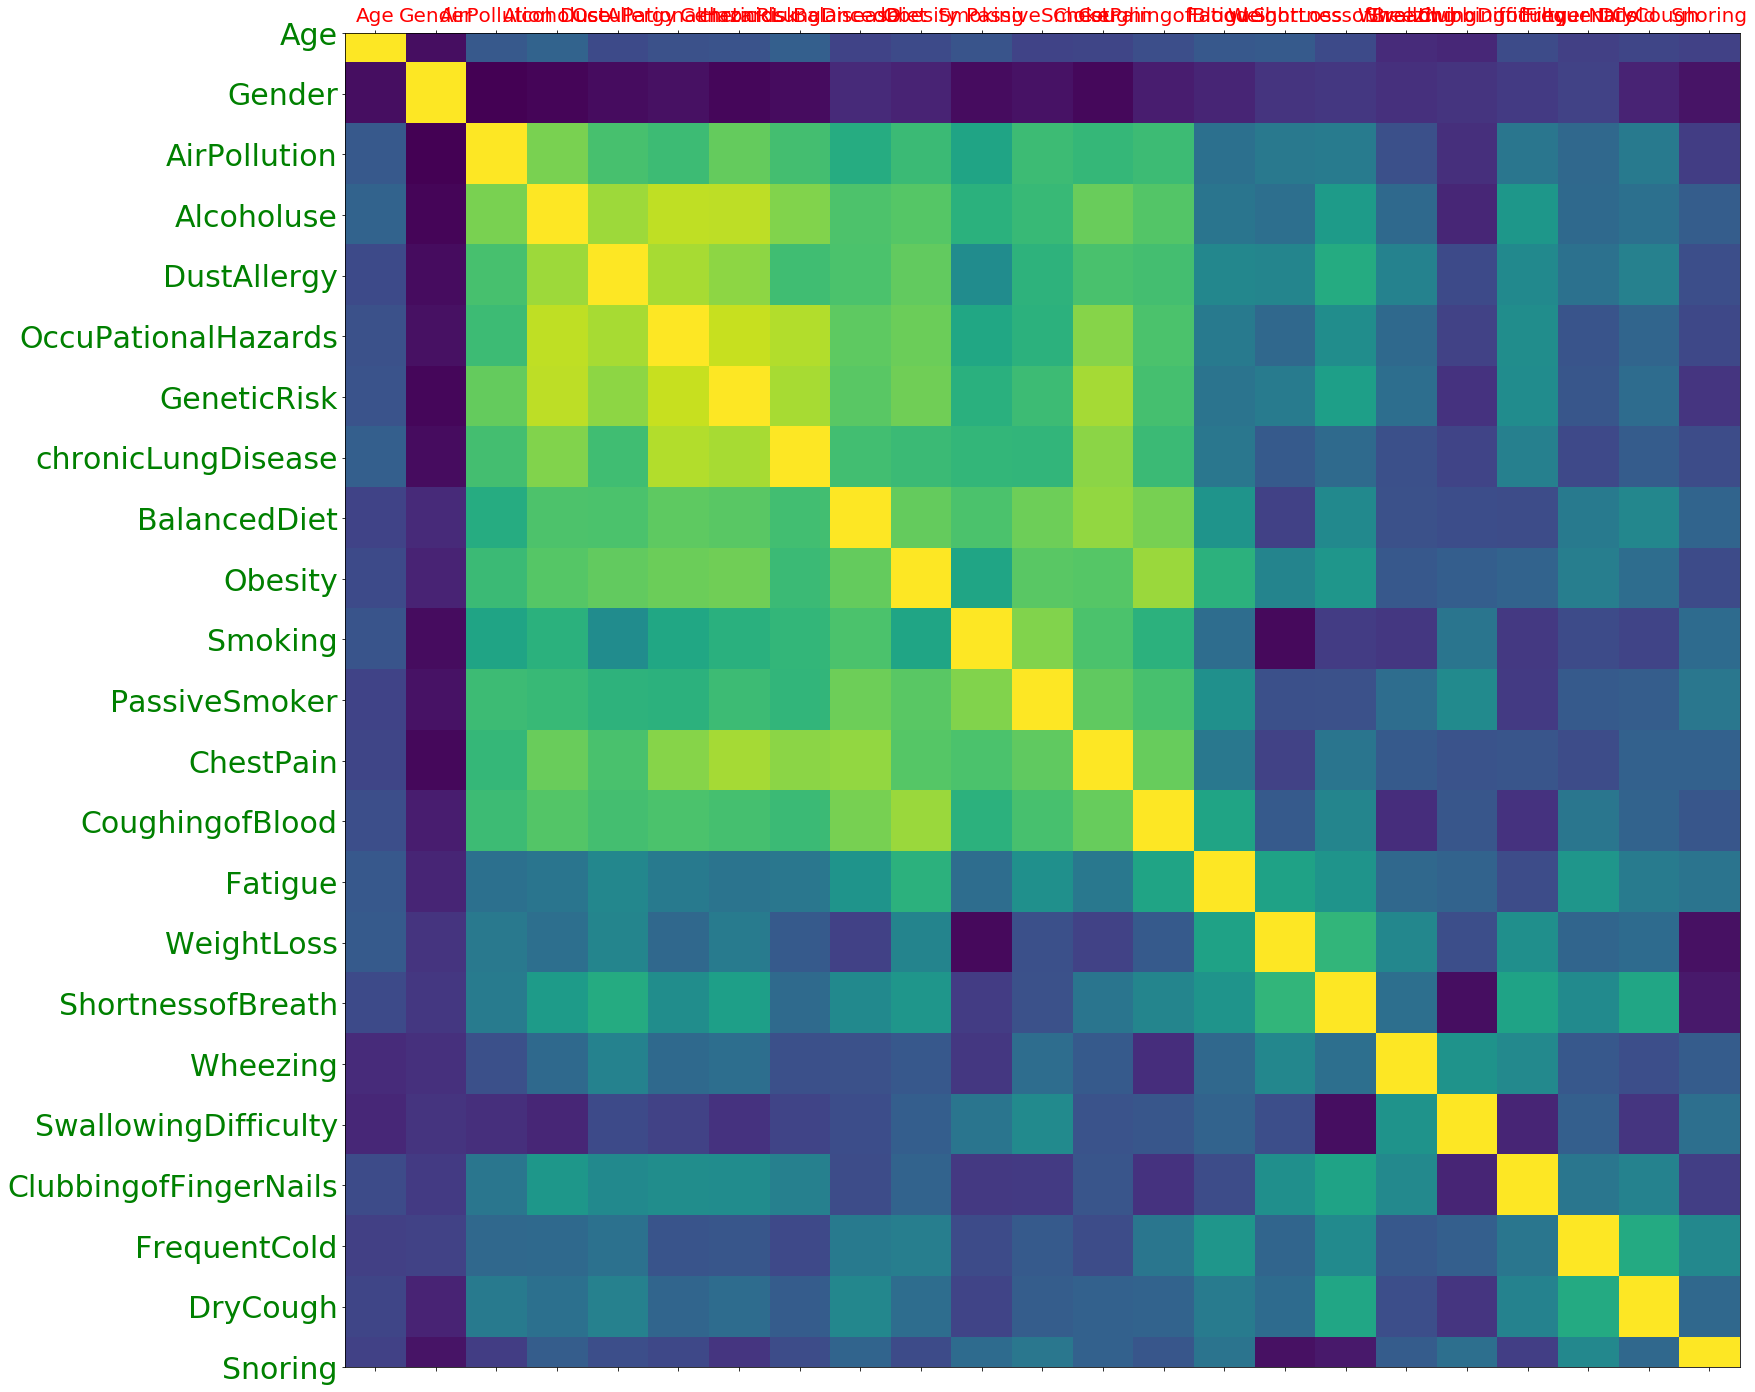

In [9]:
correlation_heatmap(data_set, 25)

### Dataset preprocessing

In [10]:
#change level column's value into number
change_level = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
}

data_set["Level"] = data_set["Level"].map(change_level)

# delete patient id 
del data_set["Patient Id"]

### Dataset after preprocessing

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_set

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,Smoking,PassiveSmoker,ChestPain,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3
5,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
6,52,2,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
7,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,1
8,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,2
9,46,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,1,5,2


### Dataset spliting

In [12]:
# features columns name 
features_col = ['Age','Gender','AirPollution','Alcoholuse','DustAllergy',
                'OccuPationalHazards','GeneticRisk','chronicLungDisease','BalancedDiet','Obesity',
                'Smoking','PassiveSmoker','ChestPain','CoughingofBlood','Fatigue','WeightLoss',
                'ShortnessofBreath','Wheezing','SwallowingDifficulty','ClubbingofFingerNails',
                'FrequentCold','DryCough','Snoring']

# prediction or result columns name 
predict_col = ['Level']

F = data_set[features_col].values
P = data_set[predict_col].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting
F_train, F_test, P_train, P_test = train_test_split(F, P, test_size = split_test_size, random_state = 1)

#check spliting is accurate or not 
print("{0:0.2f}% in training set".format((len(F_train)/len(data_set.index)) * 100))
print("{0:0.2f}% in test set".format((len(F_test)/len(data_set.index)) * 100)) 

70.00% in training set
30.00% in test set
